In [1]:
#Telecom Datasets from Kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Telco_Customer_Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
# pd.to_numeric(df.TotalCharges)

In [7]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [11]:
df.shape

(7043, 20)

In [12]:
df.iloc[488]['TotalCharges']

' '

In [13]:
df1=df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\shavej shaikh\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
# Visualizations

In [18]:
tenureChurnNo = df1[df1.Churn == 'No'].tenure
tenureChurnYes= df1[df1.Churn == 'Yes'].tenure

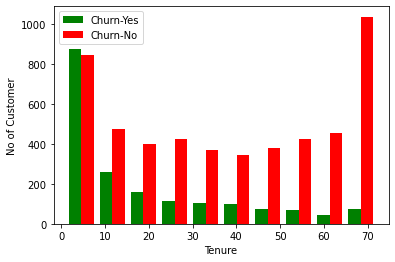

In [19]:
plt.xlabel("Tenure")
plt.ylabel("No of Customer")
plt.hist([tenureChurnYes,tenureChurnNo],color=['green','red'],label=['Churn-Yes','Churn-No'])
plt.legend()

In [20]:
# Montly Charges Vs Tenure

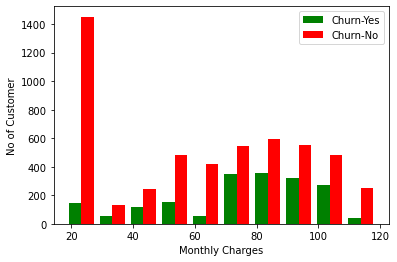

In [21]:
MonthlyCharChurnNo = df1[df1.Churn == 'No'].MonthlyCharges
MonthlyCharChurnYes= df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("No of Customer")

plt.hist([MonthlyCharChurnYes,MonthlyCharChurnNo],color=['green','red'],label=['Churn-Yes','Churn-No'])
plt.legend()

In [22]:
def printUniqueValues(df):
    for columns in df:
        if df[columns].dtype == 'object':
            print(f'{columns} : {df[columns].unique()}')

In [23]:
printUniqueValues(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [24]:
df1.replace('No internet service','No',inplace=True)

C:\Users\shavej shaikh\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [25]:
printUniqueValues(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [26]:
df1.replace('No phone service','No',inplace=True)

In [27]:
printUniqueValues(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [28]:
yes_no_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',
              'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
              'PaperlessBilling','Churn']

for col in yes_no_col:
    df1[col].replace({'Yes':1,"No":0},inplace=True)

C:\Users\shavej shaikh\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [29]:
printUniqueValues(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [30]:
df1['gender'].replace({'Male':1,'Female':0},inplace=True)

In [31]:
df1.gender.unique()

array([0, 1], dtype=int64)

In [32]:
printUniqueValues(df1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [33]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [34]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [35]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
174,0,0,0,0,32,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3196,0,0,0,0,3,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1757,1,0,1,1,54,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
3127,0,0,0,0,29,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [36]:
# To scale number in minmaxScalar form [0-1]
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [37]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6986,0,0,1,0,0.408451,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
2002,1,0,0,0,0.746479,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
1895,1,0,0,1,0.943662,1,1,1,1,0,...,1,0,0,0,0,1,1,0,0,0


In [38]:
for col in df2:
    print(f'{col} :{df2[col].unique()}')

gender :[0 1]
SeniorCitizen :[0 1]
Partner :[1 0]
Dependents :[0 1]
tenure :[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService :[0 1]
MultipleLines :[0 1]
OnlineSecurity :[0 1]
OnlineBackup :[1 0]
DeviceProtection :[0 1]
TechSupport :[

In [39]:
X = df2.drop('Churn',axis='columns')
Y = df2.Churn

In [40]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [41]:
x_train.shape

(5625, 26)

In [42]:
x_test.shape

(1407, 26)

In [43]:
len(x_train.columns)

26

In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'), #Input layer
    keras.layers.Dense(26,activation='relu'), #hidden layer
    keras.layers.Dense(1,activation='sigmoid'), #Output layer
])

model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=110)

Epoch 1/110
176/176 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.7644
Epoch 2/110
176/176 [==============================] - 0s 3ms/step - loss: 0.4287 - accuracy: 0.7945
Epoch 3/110
176/176 [==============================] - 1s 3ms/step - loss: 0.4222 - accuracy: 0.7924
Epoch 4/110
176/176 [==============================] - 0s 3ms/step - loss: 0.4180 - accuracy: 0.8011
Epoch 5/110
176/176 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.8027
Epoch 6/110
176/176 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8020
Epoch 7/110
176/176 [==============================] - 1s 3ms/step - loss: 0.4119 - accuracy: 0.8034
Epoch 8/110
176/176 [==============================] - 0s 3ms/step - loss: 0.4091 - accuracy: 0.8055
Epoch 9/110
176/176 [==============================] - 0s 3ms/step - loss: 0.4079 - accuracy: 0.8094
Epoch 10/110
176/176 [==============================] - 0s 3ms/step - loss: 0.4076 - accura

176/176 [==============================] - 1s 5ms/step - loss: 0.3559 - accuracy: 0.8354
Epoch 81/110
176/176 [==============================] - 0s 3ms/step - loss: 0.3543 - accuracy: 0.8348
Epoch 82/110
176/176 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.8322
Epoch 83/110
176/176 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8347
Epoch 84/110
176/176 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.8332
Epoch 85/110
176/176 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8372
Epoch 86/110
176/176 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8361
Epoch 87/110
176/176 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8332
Epoch 88/110
176/176 [==============================] - 1s 4ms/step - loss: 0.3505 - accuracy: 0.8318
Epoch 89/110
176/176 [==============================] - 1s 3ms/step - loss: 0.3522 - accuracy: 

In [46]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7882


[0.46813449263572693, 0.7882018685340881]

In [47]:
yp = model.predict(x_test)
yp[:5]

array([[0.04409188],
       [0.5468377 ],
       [0.00803015],
       [0.11458284],
       [0.01758972]], dtype=float32)

In [48]:
y_test[:10]

1532    0
4368    1
1712    0
527     0
1613    0
5833    0
6245    0
1060    0
4930    0
543     1
Name: Churn, dtype: int64

In [49]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [50]:
y_pred[:10]

[0, 1, 0, 0, 0, 1, 0, 0, 1, 1]

In [51]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.60      0.57      0.59       371

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.78      0.79      0.79      1407



Text(69.0, 0.5, 'Truth')

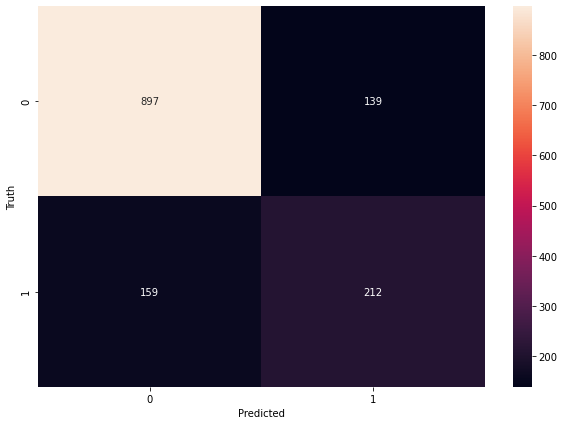

In [52]:
import seaborn as sn
cn = tf.math.confusion_matrix(labels = y_test,predictions = y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cn,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

### Accuracy

In [53]:
round((914+215)/(914+128+215+150),2)

0.8

### Precision for 0 Class i.e Precision for customers who did not churn

In [54]:
round(914/(914+150),2)

0.86

### Precision for 1 Class i.e Precision for customers who did churn

In [55]:
round(215/(215+128),2)

0.63

### Recall for 0 class

In [56]:
round(914/(914+128),2)

0.88

### Recall for 1 class

In [57]:
round(215/(215+150),2)

0.59

### Handling Unbalances Datasets

### Methods 1 : UnderSampling

In [58]:
# Class Count 
count_class_0,count_class_1 = df2.Churn.value_counts()
# Divide the class

df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [59]:
count_class_0,count_class_1

(5163, 1869)

In [60]:
df_class_0.shape

(5163, 27)

In [61]:
df_class_1.shape

(1869, 27)

In [62]:
# Convert 5163 => 1869
df_under_class_0 = df_class_0.sample(count_class_1)

In [63]:
df_under_class_0.shape

(1869, 27)

In [64]:
df3 = pd.concat([df_under_class_0,df_class_1],axis=0)

In [65]:
df3.shape

(3738, 27)

In [66]:
print("Random Under-Sampling:")
print(df3.Churn.value_counts())

Random Under-Sampling:
1    1869
0    1869
Name: Churn, dtype: int64


In [67]:
X = df3.drop("Churn",axis='columns')
Y = df3.Churn

In [68]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3848,0,0,0,0,0.014085,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1873,0,0,1,1,1.000000,1,0,1,1,1,...,1,0,0,0,0,1,0,1,0,0
1139,1,1,1,0,0.183099,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3464,0,0,1,0,0.422535,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
4235,0,1,1,0,0.774648,1,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0


In [69]:
Y.head()

3848    0
1873    0
1139    0
3464    0
4235    0
Name: Churn, dtype: int64

In [70]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=15)

In [71]:
print("Length of X-train is {} X-test is {}".format(len(x_train),len(x_test)))
print("Length of Y-train is {} Y-test is {}".format(len(y_train),len(y_test)))

Length of X-train is 2990 X-test is 748
Length of Y-train is 2990 Y-test is 748


In [72]:
def ANN(x_train,x_test,y_train,y_test,loss,weight):
    model=keras.Sequential([
        keras.layers.Dense(26,input_dim=26,activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid'),
    ])
    
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
    
    if weight == -1:
        model.fit(x_train,y_train,epochs=100)
    else:
        model.fit(x_train,y_train,epochs=100,class_weight = weight)
        
    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report is :",classification_report(y_test,y_preds))

    return y_preds

In [73]:
y_preds =ANN(x_train,x_test,y_train,y_test,'binary_crossentropy',weight=-1)

Epoch 1/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6242 - accuracy: 0.6839
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5141 - accuracy: 0.7602
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4925 - accuracy: 0.7659
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4860 - accuracy: 0.7645
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4804 - accuracy: 0.7736
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4758 - accuracy: 0.7719
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4748 - accuracy: 0.7759
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4709 - accuracy: 0.7729
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4694 - accuracy: 0.7742
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4673 - accuracy: 0.7763
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8231
Epoch 83/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3853 - accuracy: 0.8231
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3851 - accuracy: 0.8241
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3838 - accuracy: 0.8247
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8237
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3832 - accuracy: 0.8191
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8258
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3838 - accuracy: 0.8247
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.8217
Epoch 91/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3811 - accuracy: 0.8227
Epoch 92/100


### Method 2: Oversampling

In [74]:
count_class_0,count_class_1

(5163, 1869)

In [75]:
df_class_1.shape

(1869, 27)

In [76]:
df_1_Over = df_class_1.sample(count_class_0,replace=True)

In [77]:
df_1_Over.shape

(5163, 27)

In [78]:
df_class_0.shape

(5163, 27)

In [79]:
df4 = pd.concat([df_class_0,df_1_Over],axis=0)
df4.shape

(10326, 27)

In [80]:
df4.Churn.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [81]:
X1= df4.drop("Churn",axis='columns')
Y1= df4.Churn

In [82]:
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.2,random_state=15,stratify=Y1)

In [83]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [84]:
y_preds =ANN(x_train,x_test,y_train,y_test,'binary_crossentropy',weight=-1)

Epoch 1/100
259/259 [==============================] - 1s 4ms/step - loss: 0.5585 - accuracy: 0.7247
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4899 - accuracy: 0.7657
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4836 - accuracy: 0.7644
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4787 - accuracy: 0.7718
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4756 - accuracy: 0.7714
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4723 - accuracy: 0.7745
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4687 - accuracy: 0.7752
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4657 - accuracy: 0.7757
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4627 - accuracy: 0.7789
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4609 - accura

259/259 [==============================] - 1s 3ms/step - loss: 0.3762 - accuracy: 0.8308
Epoch 80/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3756 - accuracy: 0.8344
Epoch 81/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3737 - accuracy: 0.8309
Epoch 82/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3743 - accuracy: 0.8320
Epoch 83/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3743 - accuracy: 0.8329
Epoch 84/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3724 - accuracy: 0.8333
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3720 - accuracy: 0.8329
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3729 - accuracy: 0.8300
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3721 - accuracy: 0.8331: 0s - loss: 0.3688 - accuracy: 
Epoch 88/100
259/259 [==============================] - 1s 3ms/

### METHOD 3: SMOTE

In [85]:
X = df2.drop('Churn',axis='columns')
Y = df2.Churn

In [86]:
Y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
smote = SMOTE(sampling_strategy = 'minority')

In [89]:
X_sm,Y_sm=smote.fit_sample(X,Y)

In [90]:
Y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [91]:
X_train,X_test,Y_train,Y_test = train_test_split(X_sm,Y_sm,test_size=0.2,stratify=Y_sm,random_state=15)

In [92]:
Y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [93]:
Y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [94]:
y_preds = ANN(X_train,X_test,Y_train,Y_test,'binary_crossentropy',weight=-1)

Epoch 1/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5536 - accuracy: 0.7246
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4766 - accuracy: 0.7723
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4655 - accuracy: 0.7777
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4595 - accuracy: 0.7811
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4550 - accuracy: 0.7821
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4509 - accuracy: 0.7823
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4474 - accuracy: 0.7880
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4443 - accuracy: 0.7914
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4406 - accuracy: 0.7931
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4384 - accura

259/259 [==============================] - 1s 2ms/step - loss: 0.3500 - accuracy: 0.8435
Epoch 82/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3519 - accuracy: 0.8396
Epoch 83/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3465 - accuracy: 0.8461
Epoch 84/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3489 - accuracy: 0.8432
Epoch 85/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3465 - accuracy: 0.8470
Epoch 86/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3478 - accuracy: 0.8414
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3468 - accuracy: 0.8469
Epoch 88/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3470 - accuracy: 0.8444
Epoch 89/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3441 - accuracy: 0.8470
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3447 - accuracy: 

### Method 4: Use of Ensemble with undersampling

In [95]:
X = df2.drop('Churn',axis='columns')
Y = df2.Churn

In [96]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=15)

In [97]:
Y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [98]:
df2 = X_train.copy()
df2['Churn']= Y_train 
df3_class_0 = df2[df2.Churn == 0]
df3_class_1 = df2[df2.Churn == 1]

In [99]:
df3_class_0.shape,df3_class_1.shape

((4130, 27), (1495, 27))

In [100]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train= pd.concat([df_majority[start:end],df_minority],axis=0)
    X_train = df_train.drop('Churn',axis='columns')
    Y_train = df_train.Churn
    return X_train,Y_train

In [101]:
X_train,Y_train = get_train_batch(df3_class_0,df3_class_1,0,1495)
y_preds1 = ANN(X_train,X_test,Y_train,Y_test,'binary_crossentropy',weight=-1)

Epoch 1/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.6472
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5112 - accuracy: 0.7625
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.7592
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7666
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7726
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.7763
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.7763
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7759
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 0.7773
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4698 - accuracy: 0.7826
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.3970 - accuracy: 0.8221
Epoch 83/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3965 - accuracy: 0.8197
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3960 - accuracy: 0.8237
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3952 - accuracy: 0.8247
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3965 - accuracy: 0.8231
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3912 - accuracy: 0.8251
Epoch 88/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3933 - accuracy: 0.8207
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3912 - accuracy: 0.8274
Epoch 90/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3921 - accuracy: 0.8197
Epoch 91/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3901 - accuracy: 0.8204
Epoch 92/100


In [102]:
X_train,Y_train = get_train_batch(df3_class_0,df3_class_1,1495,2990)
y_preds2 = ANN(X_train,X_test,Y_train,Y_test,'binary_crossentropy',weight=-1)

Epoch 1/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6531 - accuracy: 0.6187
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5261 - accuracy: 0.7441
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4959 - accuracy: 0.7555
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4884 - accuracy: 0.7629: 0s - loss: 0.4687 - accu
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4842 - accuracy: 0.7635
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4821 - accuracy: 0.7629
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4765 - accuracy: 0.7679
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4751 - accuracy: 0.7686
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4733 - accuracy: 0.7682
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4700 - 

94/94 [==============================] - 0s 3ms/step - loss: 0.3828 - accuracy: 0.8197
Epoch 83/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3818 - accuracy: 0.8211
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.8197
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8167
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3802 - accuracy: 0.8201
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8227
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8231
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3822 - accuracy: 0.8211
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3758 - accuracy: 0.8251
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3754 - accuracy: 0.8224
Epoch 92/100


In [103]:
X_train,Y_train = get_train_batch(df3_class_0,df3_class_1,2990,4130)
y_preds3 = ANN(X_train,X_test,Y_train,Y_test,'binary_crossentropy',weight=-1)

Epoch 1/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.7249
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4944 - accuracy: 0.7639
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4822 - accuracy: 0.7738
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4773 - accuracy: 0.7700
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4725 - accuracy: 0.7750
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4688 - accuracy: 0.7825
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4667 - accuracy: 0.7829
Epoch 8/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4658 - accuracy: 0.7818
Epoch 9/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4633 - accuracy: 0.7844
Epoch 10/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.7871
Epoch 11/

83/83 [==============================] - 0s 3ms/step - loss: 0.3792 - accuracy: 0.8281
Epoch 83/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3780 - accuracy: 0.8311
Epoch 84/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3774 - accuracy: 0.8311
Epoch 85/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3756 - accuracy: 0.8273
Epoch 86/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3756 - accuracy: 0.8277
Epoch 87/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3729 - accuracy: 0.8269
Epoch 88/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3726 - accuracy: 0.8315
Epoch 89/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3729 - accuracy: 0.8307
Epoch 90/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3710 - accuracy: 0.8353
Epoch 91/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8285
Epoch 92/100


In [104]:
len(y_preds1),len(y_preds2),len(y_preds3)

(1407, 1407, 1407)

In [105]:
y_pred_final = y_preds1.copy()

for i in range(len(y_preds1)):
    n_ones = y_preds1[i] + y_preds2[i] + y_preds3[i] 
    
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [106]:
print(classification_report(Y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1033
           1       0.49      0.75      0.59       374

    accuracy                           0.72      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.72      0.74      1407

